In [3]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(123)

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
#matplotlib.rcParams['font.size'] = 8
#matplotlib.rcParams['figure.figsize'] = (5, 5)

import seaborn as sns #plot figures
from IPython.core.pylabtools import figsize

# Scipy helper functions
import scipy #get statistics percentile
from scipy.stats import percentileofscore
from scipy import stats

In [4]:
tweets_total = pd.read_csv('tweetstotal.csv',encoding= 'utf-8')

In [5]:
tweets_total.head(5).append(tweets_total.tail(5))

/var/folders/qc/s8jdkyqj7zd15w9r6vrffpsm0000gn/T/ipykernel_1581/795672648.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_total.head(5).append(tweets_total.tail(5))


,Unnamed: 0,Time,Author ID,Tweet
0,0,2017-12-12 13:10:53+00:00,386815282,"RT @goproudout: In Singapore, it’s time to cha..."
1,1,2017-12-12 13:00:32+00:00,3128624681,"In Singapore, it’s time to change closed minds..."
2,2,2017-11-29 16:48:02+00:00,820846679398051840,Singapore’s gay circle has way too many #metoo...
3,3,2017-11-04 13:32:18+00:00,905756070202576896,disclaimer i know nothing abt johnten but. the...
4,4,2017-10-08 08:46:03+00:00,908961631991767040,https://t.co/NIrmGVj5hB
10902,1567,2022-02-28 11:57:09+00:00,149585330,Court of Appeal rules Section 377A stays but c...
10903,1568,2022-02-28 11:48:30+00:00,3158178364,RT @HumanDignityT: BREAKING: Partial victory a...
10904,1569,2022-02-28 11:32:08+00:00,23029296,RT @afa_singapore: AfA Singapore is deeply dis...
10905,1570,2022-02-28 11:31:03+00:00,881337963505868800,RT @kixes: The conclusion from #Singapore’s Co...
10906,1571,2022-02-28 11:27:03+00:00,16922687,"RT @raynerkjtan: Today, the Singapore Court of..."


In [6]:
tweets_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10907 entries, 0 to 10906
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  10907 non-null  int64 
 1   Time        10907 non-null  object
 2   Author ID   10907 non-null  int64 
 3   Tweet       10907 non-null  object
dtypes: int64(2), object(2)
memory usage: 341.0+ KB


In [7]:
tweets_total = tweets_total.drop(columns=['Unnamed: 0'])

In [8]:
tweets_total.head(5).append(tweets_total.tail(5))

/var/folders/qc/s8jdkyqj7zd15w9r6vrffpsm0000gn/T/ipykernel_1581/795672648.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_total.head(5).append(tweets_total.tail(5))


,Time,Author ID,Tweet
0,2017-12-12 13:10:53+00:00,386815282,"RT @goproudout: In Singapore, it’s time to cha..."
1,2017-12-12 13:00:32+00:00,3128624681,"In Singapore, it’s time to change closed minds..."
2,2017-11-29 16:48:02+00:00,820846679398051840,Singapore’s gay circle has way too many #metoo...
3,2017-11-04 13:32:18+00:00,905756070202576896,disclaimer i know nothing abt johnten but. the...
4,2017-10-08 08:46:03+00:00,908961631991767040,https://t.co/NIrmGVj5hB
10902,2022-02-28 11:57:09+00:00,149585330,Court of Appeal rules Section 377A stays but c...
10903,2022-02-28 11:48:30+00:00,3158178364,RT @HumanDignityT: BREAKING: Partial victory a...
10904,2022-02-28 11:32:08+00:00,23029296,RT @afa_singapore: AfA Singapore is deeply dis...
10905,2022-02-28 11:31:03+00:00,881337963505868800,RT @kixes: The conclusion from #Singapore’s Co...
10906,2022-02-28 11:27:03+00:00,16922687,"RT @raynerkjtan: Today, the Singapore Court of..."


In [9]:
tweets_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10907 entries, 0 to 10906
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       10907 non-null  object
 1   Author ID  10907 non-null  int64 
 2   Tweet      10907 non-null  object
dtypes: int64(1), object(2)
memory usage: 255.8+ KB


In [10]:
tweets_total.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10902     True
10903    False
10904    False
10905    False
10906    False
Length: 10907, dtype: bool

In [11]:
tweets_total[tweets_total.duplicated()]

,Time,Author ID,Tweet
563,2017-12-12 13:10:53+00:00,386815282,"RT @goproudout: In Singapore, it’s time to cha..."
564,2017-12-12 13:00:32+00:00,3128624681,"In Singapore, it’s time to change closed minds..."
719,2017-10-08 08:46:03+00:00,908961631991767040,https://t.co/NIrmGVj5hB
1003,2017-12-29 16:30:57+00:00,963496597,Gay man in #Singapore blocked from adopting hi...
1010,2017-12-29 15:08:50+00:00,2823017921,RT @Dyke67ny: Court rejects gay Singapore man'...
...,...,...,...
10844,2022-02-28 21:53:42+00:00,500508284,RT @LGBTMarriage: #LGBT organizations are call...
10852,2022-02-28 20:04:07+00:00,1031150239745486848,RT @S_Chelvan: Last day of #LGBT+ History Mont...
10856,2022-02-28 19:00:29+00:00,1384474740384047106,RT @LGBTMarriage: #LGBT organizations are call...
10883,2022-02-28 13:27:51+00:00,743957044722532352,RT @S_Chelvan: Last day of #LGBT+ History Mont...


In [12]:
tweets_total = tweets_total.drop_duplicates()

In [13]:
tweets_total[tweets_total.duplicated()]

,Time,Author ID,Tweet


In [14]:
tweets_total['Date'] = tweets_total['Time'].map(lambda x:x.split(' ')[0])
tweets_total['Time'] = tweets_total['Time'].map(lambda x:x.split(' ')[1])

tweets_total = tweets_total.drop(columns=['Author ID'])

tweets_total['Date'] = pd.to_datetime(tweets_total['Date'])

tweets_total.set_index('Date',inplace=True)

tweets_total['Year'] = tweets_total.index.year
tweets_total['Month'] = tweets_total.index.month
tweets_total['Weekday'] = tweets_total.index.weekday


tweets_total.head(5).append(tweets_total.tail(5))

/var/folders/qc/s8jdkyqj7zd15w9r6vrffpsm0000gn/T/ipykernel_1581/1528171753.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_total.head(5).append(tweets_total.tail(5))


,Time,Tweet,Year,Month,Weekday
Date,,,,,
2017-12-12,13:10:53+00:00,"RT @goproudout: In Singapore, it’s time to cha...",2017,12,1
2017-12-12,13:00:32+00:00,"In Singapore, it’s time to change closed minds...",2017,12,1
2017-11-29,16:48:02+00:00,Singapore’s gay circle has way too many #metoo...,2017,11,2
2017-11-04,13:32:18+00:00,disclaimer i know nothing abt johnten but. the...,2017,11,5
2017-10-08,08:46:03+00:00,https://t.co/NIrmGVj5hB,2017,10,6
2022-02-28,11:59:03+00:00,Singapore court refuses to overturn archaic ga...,2022,2,0
2022-02-28,11:48:30+00:00,RT @HumanDignityT: BREAKING: Partial victory a...,2022,2,0
2022-02-28,11:32:08+00:00,RT @afa_singapore: AfA Singapore is deeply dis...,2022,2,0
2022-02-28,11:31:03+00:00,RT @kixes: The conclusion from #Singapore’s Co...,2022,2,0


In [15]:
tweets_total.index

DatetimeIndex(['2017-12-12', '2017-12-12', '2017-11-29', '2017-11-04',
               '2017-10-08', '2017-10-01', '2017-09-10', '2017-08-26',
               '2017-08-17', '2017-08-15',
               ...
               '2022-02-28', '2022-02-28', '2022-02-28', '2022-02-28',
               '2022-02-28', '2022-02-28', '2022-02-28', '2022-02-28',
               '2022-02-28', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', length=10202, freq=None)

In [17]:
tweets_total.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10202 entries, 2017-12-12 to 2022-02-28
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Time     10202 non-null  object
 1   Tweet    10202 non-null  object
 2   Year     10202 non-null  int64 
 3   Month    10202 non-null  int64 
 4   Weekday  10202 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 478.2+ KB


In [18]:
year_count = tweets_total['Year'].value_counts().sort_index()
year_count2 = year_count.sort_index()
print(year_count2)

2017    2003
2018    2021
2019    2024
2020    1573
2021    1296
2022    1285
Name: Year, dtype: int64


# Plot 1 for Overview of All Tweets

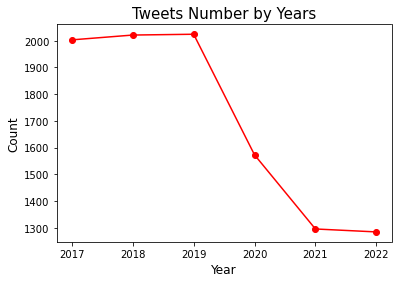

In [19]:
#Line plot of Years
plt.plot(year_count2.index, year_count2.values, color='r', marker='o', markerfacecolor='red')
plt.xlabel('Year',fontsize=12); 
plt.ylabel('Count',fontsize=12); 
plt.title('Tweets Number by Years',fontsize=15);


Select Data

In [20]:
# Select data that matches 
tweets_total.loc[tweets_total['Tweet'].str.contains('gay', na=False)].head(3)

,Time,Tweet,Year,Month,Weekday
Date,,,,,
2017-12-12,13:00:32+00:00,"In Singapore, it’s time to change closed minds...",2017,12,1
2017-11-29,16:48:02+00:00,Singapore’s gay circle has way too many #metoo...,2017,11,2
2017-07-16,18:02:06+00:00,Singapore gay pride rally draws thousands amid...,2017,7,6


In [21]:
# Create a list of terms to search for
searchfor = ['gay circle', 'lgbt', 'Singapore gay','gay']

comment = tweets_total.loc[tweets_total['Tweet'].str.contains('|'.join(searchfor), na=False)]
comment.head(10)

,Time,Tweet,Year,Month,Weekday
Date,,,,,
2017-12-12,13:10:53+00:00,"RT @goproudout: In Singapore, it’s time to cha...",2017,12,1
2017-12-12,13:00:32+00:00,"In Singapore, it’s time to change closed minds...",2017,12,1
2017-11-29,16:48:02+00:00,Singapore’s gay circle has way too many #metoo...,2017,11,2
2017-07-16,18:02:06+00:00,Singapore gay pride rally draws thousands amid...,2017,7,6
2017-07-10,15:20:40+00:00,#flashback to #pinkdot in #gay-singapore brin...,2017,7,0
2017-07-10,14:18:49+00:00,RT @Reuters: Singapore gay pride rally draws t...,2017,7,0
2017-07-04,16:10:45+00:00,RT @AudiKhalid: What's after Pinkdot? https://...,2017,7,1
2017-07-03,02:06:01+00:00,Singapore gay pride rally draws thousands amid...,2017,7,0
2017-07-02,21:05:53+00:00,Thousands rally for gay pride in Singapore htt...,2017,7,6


In [22]:
print("Number of returned related comment is {}".format(comment.shape[0]))

Number of returned related comment is 3193


# Text preprocessing

In [23]:
# clean the news content by using clean method from hero package
import texthero as hero

In [24]:
#create custom pipeline
custom_pipeline = [hero.preprocessing.fillna,
                   hero.preprocessing.lowercase,
                   hero.preprocessing.remove_whitespace,
                   hero.preprocessing.remove_urls,
                   hero.preprocessing.remove_stopwords,
                   hero.preprocessing.remove_punctuation,
                   hero.preprocessing.remove_diacritics,
                   hero.preprocessing.remove_digits
                   ]

tweets_total['clean_Tweet'] = tweets_total['Tweet'].pipe(hero.clean, custom_pipeline)

In [25]:
#tweets_total['clean_Tweet'] = hero.remove_urls(tweets_total['Tweet'])
#tweets_total.iloc[0].clean_Tweet

In [26]:
# clean the Tweet by using clean method from hero package
#tweets_total['clean_Tweet'] = hero.clean(tweets_total['clean_Tweet'])

In [27]:
#show unclean and clean Tweet

tweets_total[['Tweet','clean_Tweet']].head(3).append(tweets_total[['Tweet','clean_Tweet']].tail(3))

/var/folders/qc/s8jdkyqj7zd15w9r6vrffpsm0000gn/T/ipykernel_1581/3148481373.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tweets_total[['Tweet','clean_Tweet']].head(3).append(tweets_total[['Tweet','clean_Tweet']].tail(3))


,Tweet,clean_Tweet
Date,,
2017-12-12,"RT @goproudout: In Singapore, it’s time to cha...",rt goproudout singapore time change clos...
2017-12-12,"In Singapore, it’s time to change closed minds...",singapore time change closed minds towards...
2017-11-29,Singapore’s gay circle has way too many #metoo...,singapore gay circle way many metoo stories...
2022-02-28,RT @afa_singapore: AfA Singapore is deeply dis...,rt afa singapore afa singapore deeply disap...
2022-02-28,RT @kixes: The conclusion from #Singapore’s Co...,rt kixes conclusion singapore court appe...
2022-02-28,"RT @raynerkjtan: Today, the Singapore Court of...",rt raynerkjtan today singapore court appe...


In [28]:
tweets_total.dropna(subset=['clean_Tweet'])

,Time,Tweet,Year,Month,Weekday,clean_Tweet
Date,,,,,,
2017-12-12,13:10:53+00:00,"RT @goproudout: In Singapore, it’s time to cha...",2017,12,1,rt goproudout singapore time change clos...
2017-12-12,13:00:32+00:00,"In Singapore, it’s time to change closed minds...",2017,12,1,singapore time change closed minds towards...
2017-11-29,16:48:02+00:00,Singapore’s gay circle has way too many #metoo...,2017,11,2,singapore gay circle way many metoo stories...
2017-11-04,13:32:18+00:00,disclaimer i know nothing abt johnten but. the...,2017,11,5,disclaimer know nothing abt johnten vibes ...
2017-10-08,08:46:03+00:00,https://t.co/NIrmGVj5hB,2017,10,6,
...,...,...,...,...,...,...
2022-02-28,11:59:03+00:00,Singapore court refuses to overturn archaic ga...,2022,2,0,singapore court refuses overturn archaic gay ...
2022-02-28,11:48:30+00:00,RT @HumanDignityT: BREAKING: Partial victory a...,2022,2,0,rt humandignityt breaking partial victory ...
2022-02-28,11:32:08+00:00,RT @afa_singapore: AfA Singapore is deeply dis...,2022,2,0,rt afa singapore afa singapore deeply disap...


In [29]:
tweets_total.iloc[0:5].Tweet  #unclean tweets

Date
2017-12-12    RT @goproudout: In Singapore, it’s time to cha...
2017-12-12    In Singapore, it’s time to change closed minds...
2017-11-29    Singapore’s gay circle has way too many #metoo...
2017-11-04    disclaimer i know nothing abt johnten but. the...
2017-10-08                              https://t.co/NIrmGVj5hB
Name: Tweet, dtype: object

In [30]:
tweets_total.iloc[0:5].clean_Tweet #clean tweets

Date
2017-12-12    rt  goproudout   singapore   time  change clos...
2017-12-12     singapore   time  change closed minds towards...
2017-11-29    singapore gay circle  way  many  metoo stories...
2017-11-04    disclaimer  know nothing abt johnten    vibes ...
2017-10-08                                                     
Name: clean_Tweet, dtype: object

In [31]:
tweets_total.to_csv('tweetstotal_clean.csv')

# Visualization

singapore    8672
rt           4642
gay          3801
lgbt         2463
lesbian      2043
sex          1840
377a         1405
cut          1261
court        1073
kiss         1040
star          851
wars          845
section       796
man           704
pinkdot       680
adopt         624
law           569
people        551
scene         535
china         521
Name: clean_Tweet, dtype: int64


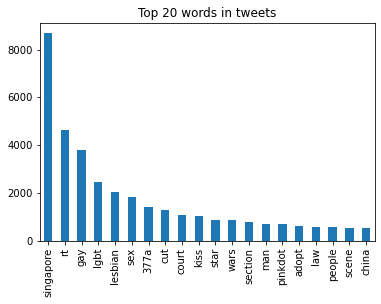

In [32]:
NUM_TOP_WORDS = 20
top_20 = hero.visualization.top_words(tweets_total.loc[:, 'clean_Tweet']).head(NUM_TOP_WORDS)
print(top_20)
top_20.plot.bar(rot=90, title="Top 20 words in tweets");
plt.show();

# Plot 2 for Tweets Visualization

## Gay-bar gram 

gay          3801
singapore    3517
rt           1492
sex           884
court         841
man           622
adopt         597
lgbt          589
son           484
lesbian       444
Name: clean_Tweet, dtype: int64


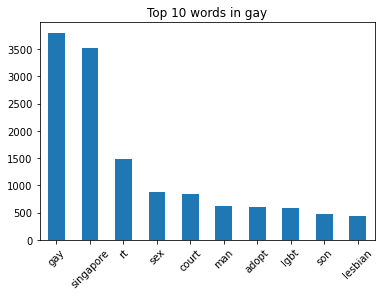

In [33]:
tweets_gay = tweets_total.loc[tweets_total['clean_Tweet'].str.contains('gay', na=False)]

NUM_TOP_WORDS = 10
gay_top_10 = hero.visualization.top_words(tweets_gay.loc[:, 'clean_Tweet']).head(NUM_TOP_WORDS)
print(gay_top_10)
gay_top_10.plot.bar(rot=45, title="Top 10 words in gay");
plt.show();

## Lesbian-bar gram

lesbian      2043
singapore    1997
cut           906
rt            724
sex           559
kiss          529
star          482
wars          480
scene         470
gay           456
Name: clean_Tweet, dtype: int64


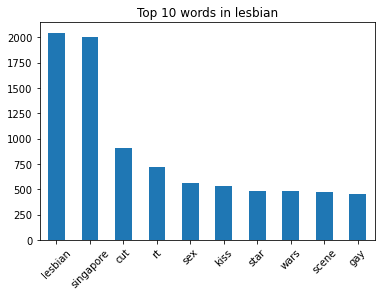

In [35]:
tweets_lesbian = tweets_total.loc[tweets_total['clean_Tweet'].str.contains('lesbian', na=False)]


NUM_TOP_WORDS = 10
lesbian_top_10 = hero.visualization.top_words(tweets_lesbian.loc[:, 'clean_Tweet']).head(NUM_TOP_WORDS)
print(lesbian_top_10)
lesbian_top_10.plot.bar(rot=45, title="Top 10 words in lesbian");
plt.show();

## LGBT-bar gram

singapore    2642
lgbt         2463
rt           1161
gay           686
lgbtq         487
community     363
sex           362
rights        295
377a          289
people        227
Name: clean_Tweet, dtype: int64


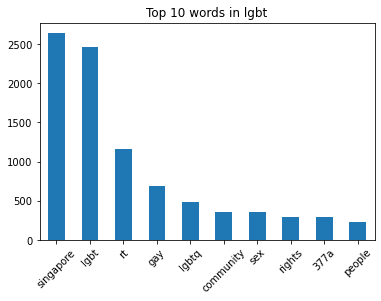

In [37]:
tweets_lgbt = tweets_total.loc[tweets_total['clean_Tweet'].str.contains('lgbt', na=False)]

NUM_TOP_WORDS = 10
lgbt_top_10 = hero.visualization.top_words(tweets_lgbt.loc[:, 'clean_Tweet']).head(NUM_TOP_WORDS)
print(lgbt_top_10)
lgbt_top_10.plot.bar(rot=45, title="Top 10 words in lgbt");
plt.show();

## 377A-bar gram

cut          1173
wars          845
star          844
singapore     832
kiss          827
rt            759
lesbian       483
scene         451
china         435
showings      426
Name: clean_Tweet, dtype: int64


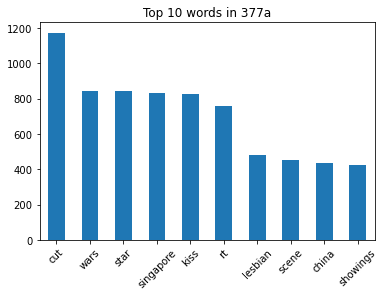

In [39]:
tweets_377a = tweets_total.loc[tweets_total['clean_Tweet'].str.contains('wars', na=False)]

NUM_TOP_WORDS = 10
wars_top_10 = hero.visualization.top_words(tweets_377a.loc[:, 'clean_Tweet']).head(NUM_TOP_WORDS)
print(wars_top_10)
wars_top_10.plot.bar(rot=45, title="Top 10 words in 377a");
plt.show();